# CNN and pretrained CNN for the cat/dog dataset

We construct a CNN to classify publically available images into cats/dogs (binary classification)
We first construct a CNN from scratch and train it on 2000 images of cats and dogs. We quicklyrealize that our model suffers from overfitting due to the lack of images. We first use data augmentation to artificially increase the size our dataset and improve our model's accuaracy. We finally use pretrained cnn models to further improve our accuracy.

## Data Preprocessing
We download the data, construct directory and split it into train validation test datasets

In [1]:
import pyprind
import pandas as pd
import os
import numpy as np
import re
from PIL import Image
import imageio
import os, shutil


basepath = 'C:\\Users\\marwe\\Desktop\\food_data'
train_dir = os.path.join(basepath, 'train2')
#os.mkdir(train_dir)
validation_dir = os.path.join(basepath, 'validation2')
#os.mkdir(validation_dir)
test_dir = os.path.join(basepath, 'test2')
#os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

'''
basepath1 = 'C:\\Users\\marwe\\Desktop\\food_data\\train2'
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(basepath1, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''    
#sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

train_generator=train_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_gen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

print('\nPreprocessing is done! ')


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Preprocessing is done! 


## First CNN

We fit our first CNN and concludes it overfits our data!

Epoch 1/20
100/100 [==============================] - 48s 483ms/step - loss: 0.6950 - acc: 0.5260 - val_loss: 0.6799 - val_acc: 0.5420
Epoch 2/20
100/100 [==============================] - 51s 508ms/step - loss: 0.6727 - acc: 0.5870 - val_loss: 0.6721 - val_acc: 0.5570
Epoch 3/20
100/100 [==============================] - 50s 497ms/step - loss: 0.6359 - acc: 0.6295 - val_loss: 0.5981 - val_acc: 0.6730
Epoch 4/20
100/100 [==============================] - 49s 494ms/step - loss: 0.5858 - acc: 0.6975 - val_loss: 0.5269 - val_acc: 0.6940
Epoch 5/20
100/100 [==============================] - 50s 495ms/step - loss: 0.5496 - acc: 0.7215 - val_loss: 0.7796 - val_acc: 0.6300
Epoch 6/20
100/100 [==============================] - 51s 512ms/step - loss: 0.5179 - acc: 0.7455 - val_loss: 0.6265 - val_acc: 0.6820
Epoch 7/20
100/100 [==============================] - 51s 508ms/step - loss: 0.4865 - acc: 0.7640 - val_loss: 0.6487 - val_acc: 0.7120
Epoch 8/20
100/100 [==============================] - 5

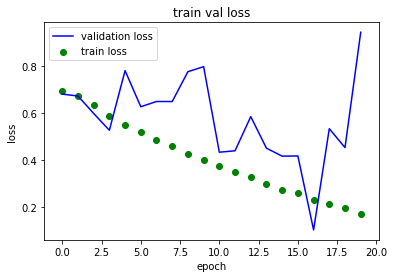

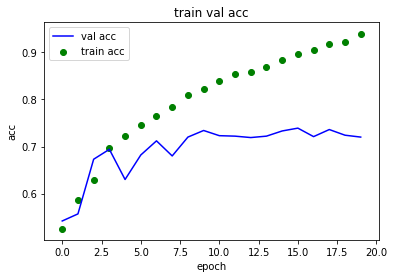

In [5]:
#implement the convet
from keras import layers
from keras import models
from keras import optimizers

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

#Data Preprocessing
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50,verbose=1)

import matplotlib.pyplot as plt 
from keras.preprocessing import image

model.save('cats_and_dogs_small_1.h5')

#print(history.history)

plt.plot(np.arange(20),history.history['val_loss'],color='blue',label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.scatter(np.arange(20),history.history['loss'],color='green',label='train loss')
plt.legend(loc='best')
plt.title('train val loss')
plt.show()

plt.plot(np.arange(20),history.history['val_acc'],color='blue',label='val acc')
plt.scatter(np.arange(20),history.history['acc'],color='green',label='train acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(loc='best')
plt.title('train val acc')
plt.show()



## CNN using data augmentation to tackle overfitting
We use the built in keras image generator to increase the size of our dataset using data augmentation techniques (we illustrate it via an example)
We then fit a CNN on our augmented dataset and notice our validation accuracy has improved
We plot graphs to summarize our results

(1, 150, 150, 3)


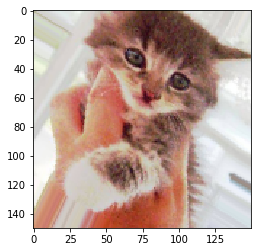

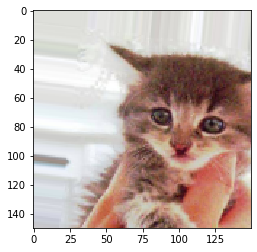

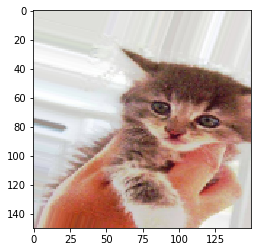

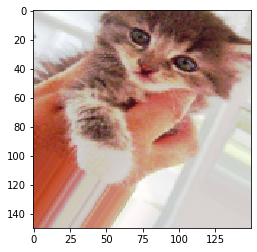

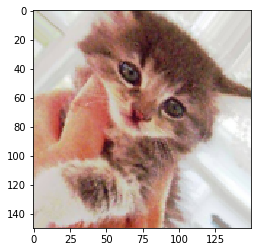

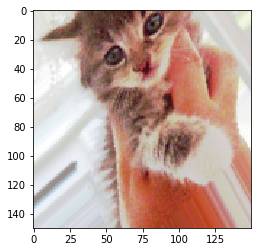

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 80s 804ms/step - loss: 0.6928 - acc: 0.5303 - val_loss: 0.7174 - val_acc: 0.5063
Epoch 2/100
100/100 [==============================] - 79s 795ms/step - loss: 0.6833 - acc: 0.5509 - val_loss: 0.7078 - val_acc: 0.5470
Epoch 3/100
100/100 [==============================] - 76s 764ms/step - loss: 0.6699 - acc: 0.5977 - val_loss: 0.6306 - val_acc: 0.5431
Epoch 4/100
100/100 [==============================] - 72s 719ms/step - loss: 0.6596 - acc: 0.6004 - val_loss: 0.6650 - val_acc: 0.6392
Epoch 5/100
100/100 [==============================] - 72s 722ms/step - loss: 0.6405 - acc: 0.6250 - val_loss: 0.5634 - val_acc: 0.6745
Epoch 6/100
100/100 [==============================] - 73s 725ms/step - loss: 0.6269 - acc: 0.6484 - val_loss: 0.5193 - val_acc: 0.7004
Epoch 7/100
100/100 [==============================] - 72s 720ms/step - loss: 0.6109 - acc: 0.6595 -

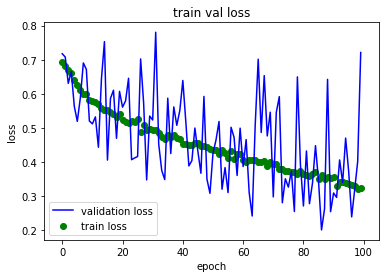

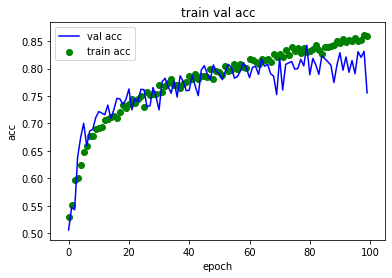

In [3]:
#we need data augmentation: generating more pictures to avoid overfitting
datagen= ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,fill_mode='nearest',horizontal_flip=True)
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img=fnames[3]
image_ex=image.load_img(img,target_size=(150,150))
x=image.img_to_array(image_ex)
x=x.reshape((1,)+x.shape)
print(x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplt=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%6==0:
        break
plt.show()

train_gen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,fill_mode='nearest',horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_dat=train_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary') 
valid_dat=test_gen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

history = model.fit_generator(
train_dat,
steps_per_epoch=100,
epochs=100,
validation_data=valid_dat,
validation_steps=50,verbose=1)

model.save('cats_and_dogs_small_2.h5')

plt.plot(np.arange(100),history.history['val_loss'],color='blue',label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.scatter(np.arange(100),history.history['loss'],color='green',label='train loss')
plt.legend(loc='best')
plt.title('train val loss')
plt.show()

plt.plot(np.arange(100),history.history['val_acc'],color='blue',label='val acc')
plt.scatter(np.arange(100),history.history['acc'],color='green',label='train acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(loc='best')
plt.title('train val acc')
plt.show()



## Fitting a pretrained CNN on our dataset
We use the pretrained model VGG16 on our dataset. The pretrained model is available in keras
We freeze the top layers responsible of identifying shapes edges... and train the last few layers on our dataset.
We notice how model accuracy increases significantly with VGG16. 

We plot few of the layers' output in an effort to understand the mechanism of our pretrained CNN.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4646 - acc: 0.7720 - val_loss: 0.3286 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3031 - acc: 0.8665 - val_loss: 0.2562 - val_acc: 0.8950
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2415 - acc: 0.9010 - val_loss: 0.2513 - val_acc: 0.8980
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2013 - acc: 0.9200 - val_loss: 0.2395 - val_acc: 0.9010
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1800 - acc: 0.9270 - val_loss: 0.2366 - val_acc: 0.9040
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1445 - acc: 0.9460 - val_loss: 0.3625 - val_acc: 0.8490
Epoch 7/30
2000/2000 [

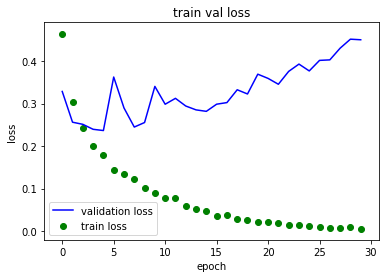

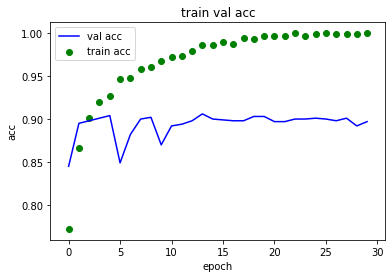

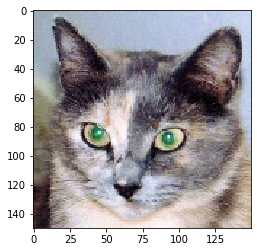

predicted output for our image:  [[('n02123394', 'Persian_cat', 0.56079674), ('n02123045', 'tabby', 0.06643643), ('n02112018', 'Pomeranian', 0.066150606)]]


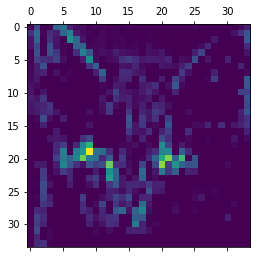

In [6]:
#we use pretrained models:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
#weight: checkpoint weights
#Include_top:  False means we are not including the densly connected part 
#input_shape (optional)

#first1: predict using existing model then train on dense part
Datagen= ImageDataGenerator(rescale=1./255)
batch_size=20
#generate images anf predict them usinf existing model
def prediic(directory,samples):
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=Datagen.flow_from_directory(directory,target_size=(150,150),class_mode='binary',batch_size=batch_size)
    i=0
    for batches,label in generator:
        weight=conv_base.predict(batches)
        features[i*batch_size:(i+1)*batch_size]=weight
        labels[i*batch_size:(i+1)*batch_size]=label
        i+=1
        #print(i)
        if i*batch_size>=samples:
            break
    return features,labels

#extract features
train_feat,train_lab= prediic(train_dir,2000)
valid_feat,valid_lab= prediic(validation_dir,1000)
test_feat,test_lab= prediic(validation_dir,1000)

#reshape features
train_feat=np.reshape(train_feat,newshape=(2000,4*4*512))
valid_feat=np.reshape(valid_feat,newshape=(1000,4*4*512))
test_feat=np.reshape(test_feat,newshape=(1000,4*4*512))

#add dense to model

model=models.Sequential()
model.add(layers.Dense(265,activation='relu',input_dim=(4*4*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history=model.fit(train_feat,train_lab,batch_size=20,epochs=30,validation_data=(valid_feat,valid_lab))    
    
plt.plot(np.arange(30),history.history['val_loss'],color='blue',label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.scatter(np.arange(30),history.history['loss'],color='green',label='train loss')
plt.legend(loc='best')
plt.title('train val loss')
plt.show()

plt.plot(np.arange(30),history.history['val_acc'],color='blue',label='val acc')
plt.scatter(np.arange(30),history.history['acc'],color='green',label='train acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(loc='best')
plt.title('train val acc')
plt.show()

from keras import models
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

img_path= 'C:\\Users\\marwe\\Desktop\\food_data\\test2\\cats\\cat.1700.jpg'
img1=image.load_img(img_path,target_size=(150,150))
plt.imshow(img1)
plt.show()

img_tensor=image.img_to_array(img1)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#print(img_tensor.shape)

modelo=load_model('cats_and_dogs_small_2.h5')
#print(modelo.summary())

Layers_output=[layer.output for layer in modelo.layers[:8]]
activation_model=models.Model(inputs=modelo.input,outputs=Layers_output)

activations=activation_model.predict(img_tensor)
#print(activations[0].shape)
plt.matshow(activations[4][0, :, :, 1], cmap='viridis')

#see this heatmap thingy
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

conv_base = VGG16(weights='imagenet')
#image1='C:\\Users\\marwe\\Desktop\\food_data\\download.jpg'
image1='C:\\Users\\marwe\\Desktop\\food_data\\test2\\cats\\cat.1600.jpg'
img2=image.load_img(image1,target_size=(224,224))
img2_arr=image.img_to_array(img2)
x=np.expand_dims(img2_arr,axis=0)
x=preprocess_input(x)

preds=conv_base.predict(x)
print("predicted output for our image: ",decode_predictions(preds,top=3))



